<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:250%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 20px; padding-top: 20px; padding-bottom: 20px;"><b><b><span style='color:#2ae4f5''></span></b> Exercise no. 4  </b></p>
</div>

# Groupby and Introduction to Boxplot

1. [Quick recap](#1)
2. [Groupby: titanic_df questions](#2)
3. [Boxplot: Definition and example](#3)
4. [Working with Boxplot](#4)


#  <b id="Top"> </b>  

<a id='1'></a>

<a class="anchor" id='1'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">Quick recap.</h1>

---

>
>* `groupby()` - group according to the columns specified
>
>* `reset_index()`  adds a numerical index
>
>* `pd.to_datetime(df['date'])` - changes the attribute type to datetime
>
>* `pd.DatetimeIndex(df['date']).month` - extracts the month from the datatime attribute
>
>* `apply` - applies a function on each row (axis =0) in the dataframe. Change to (axis = 1) to apply the function on each column [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)
>
>* `lambda` - small anonymous function
>
>* `agg` - apply multiple functions at once, one for each specified column [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
>
>* `unstack` - unstack the inner-most index onto a column [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)
>
>* `droplevel(0, axis = 1)` - drops the highest (first) level in the column index of a multi-index dataframe
>
>* `transpose` - switch between columns and rows
---

<a id='2'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">Groupby: titanic_df</h1>

In [2]:
import pandas as pd

In [3]:
import os
os.getcwd()

'C:\\Users\\razel\\Desktop\\אריאל\\data-analytics\\\u200f\u200fMy Lectures Sem B 24\\tirgul4\\Tigul4'

In [4]:
url = 'https://raw.githubusercontent.com/Razelbaz1/exercises-package/master/data/titanic.csv'
titanic_df = pd.read_csv(url,encoding='latin1')

In [5]:
titanic_df.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


# Now you.

#### 1.1 What is the average age for male versus female Titanic passengers?

In [6]:
titanic_df.columns

Index(['row.names', 'pclass', 'survived', 'name', 'age', 'embarked',
       'home.dest', 'room', 'ticket', 'boat', 'sex'],
      dtype='object')

sex
female    30.572702
male      31.581410
Name: age, dtype: float64

> Or alternatively: if we want to save the output as a `DataFrame`.

,age
sex,
female,30.572702
male,31.581410


#### 1.2 How many passengers were in each class ?

pclass
1st    322
2nd    280
3rd    711
Name: pclass, dtype: int64

,pclass,counts
0,1st,322
1,2nd,280
2,3rd,711


**OR**

pclass
1st    322
2nd    280
3rd    711
dtype: int64

> Basically, a `size` function counts the number of rows in each group.

In [12]:
#titanic_df.groupby("pclass").count()  

In [13]:
# Whats the problem here ?

#### 1.3 Answer the question so that the output is as a data frame. 

In [14]:
# As dataframe


,pclass,counts
0,1st,322
1,2nd,280
2,3rd,711


**OR**

,pclass,counts
0,1st,322
1,2nd,280
2,3rd,711


#### 2. Suggest a solution for the code you wrote to additionally classify by gender.

pclass  sex   
1st     male      179
        female    143
2nd     male      173
        female    107
3rd     male      498
        female    213
Name: count, dtype: int64

pclass  sex   
1st     female    143
        male      179
2nd     female    107
        male      173
3rd     female    213
        male      498
Name: sex, dtype: int64

#### 3.1 Suggest a solution for how many survived by class and gender.

pclass  sex   
1st     female    134
        male       59
2nd     female     94
        male       25
3rd     female     79
        male       58
Name: survived, dtype: int64

#### 3.2 Suggest a solution for how many survived AND not survived by class and gender.

pclass  sex     survived
1st     female  1           134
                0             9
        male    0           120
                1            59
2nd     female  1            94
                0            13
        male    0           148
                1            25
3rd     female  0           134
                1            79
        male    0           440
                1            58
Name: count, dtype: int64

#### 4. Suggest a solution for how many total and average survivors by class

,mean,sum
pclass,,
1st,0.599379,193
2nd,0.425000,119
3rd,0.192686,137


#### Can we convert continuous or interval ratio types of data into a categorical variable ?
#### Think about a way to group by `age`


---
#### A common way to look at the distribution of a continuous number is through a graph called a `histogram`. [Read here for more](#https://seaborn.pydata.org/generated/seaborn.histplot.html)
A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

We will talk about this in detail during the semester.

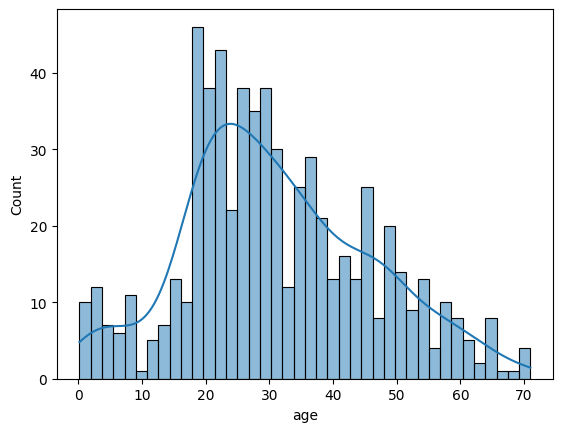

In [21]:
import seaborn as sns
sns.histplot(titanic_df['age'],bins = 40 ,kde= True);

#### Can we convert continuous or interval ratio types of data into a categorical variable ?
#### Think about a way to group by `age`


##### Hint: look for `pd.cut` via internet

"
    Bin values into discrete intervals.

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.
        "

### So how do we divide them?
##### By equal ranges in numbers **or** by the amount of values?

In [22]:
titanic_df[['age']].describe().round()

,age
count,633.0
mean,31.0
std,15.0
min,0.0
25%,21.0
50%,30.0
75%,41.0
max,71.0


#### Division by fixed numerical ranges

In [23]:
titanic_df['age_bins'] = pd.cut(titanic_df['age'], bins = 3, labels = ('young', 'middle_age', 'old' )) # bins also accept intervals such as bins=range(0, 100, 10)

In [24]:
bins = pd.cut(titanic_df['age'], bins=3) #show intervals
print(bins.cat.categories)  

IntervalIndex([(0.0959, 23.778], (23.778, 47.389], (47.389, 71.0]], dtype='interval[float64, right]')


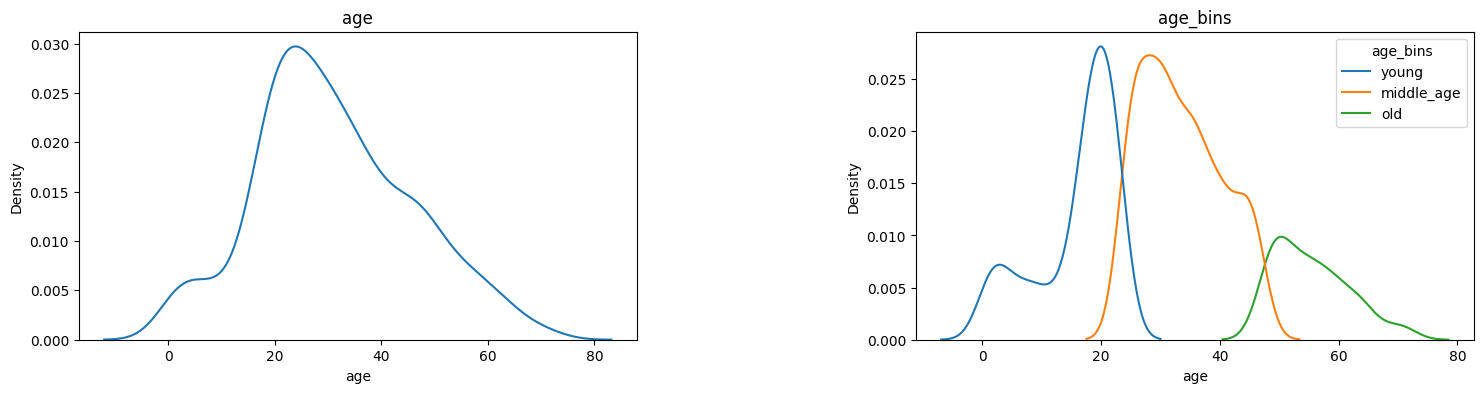

In [25]:
import matplotlib.pyplot as plt  #for reshaping graph size

fig, ax = plt.subplots(1,2, figsize = (18,4))
plt.subplots_adjust(wspace = 0.5)

sns.kdeplot(data = titanic_df,x='age', ax = ax[0]);
ax[0].set_title('age');

sns.kdeplot(data = titanic_df,x='age',hue= 'age_bins', ax = ax[1] );
ax[1].set_title('age_bins');


**KDE, or Kernl Density Estimation, is a statistical tool that aims to estimate the density function of a random variable (distribution) based on given data.** (More on the graph later in the semester.)

#### How many have survived now by age group?

In [26]:
titanic_df.groupby(['age_bins'], observed=False)['survived'].sum()

# what happen if :
# titanic_df.groupby(['age_bins']).sum()

# every numeric column will appear

age_bins
young         104
middle_age    130
old            47
Name: survived, dtype: int64

**Add `observed=False` to include the categories that did not receive values** 

Suppose the `age_bins` category contains the following ranges: ['young', 'middle_age', 'old'], but the data only contains values for the ranges `young` and `old`.

`observed=False`: The output will also include the `middle_age` category with a value of `0`, because it is part of the defined categories.

`observed=True`: The output will only include `young` and `old`, without categories that have no data.

###  Did you know ?

#### You can display a graph as a result of grouping directly.

#### Read more online about `plot()`

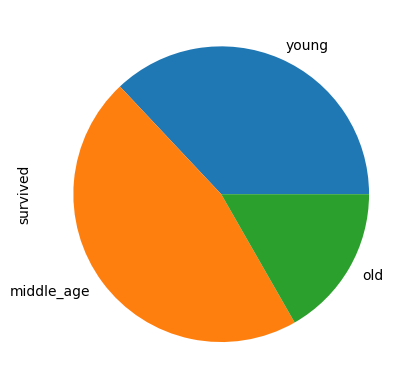

In [27]:
titanic_df.groupby(['age_bins'], observed=False)['survived'].sum().plot(kind = 'pie');

##### Have we classified the ages correctly?
##### Suggest a way to check this.

In [27]:
age_group_stats = titanic_df.groupby('age_bins', observed=False)['age'].describe()
age_group_stats

,count,mean,std,min,25%,50%,75%,max
age_bins,,,,,,,,
young,209.0,15.946969,6.836041,0.1667,13.0,18.0,21.0,23.0
middle_age,325.0,33.596923,6.797829,24.0000,28.0,32.0,39.0,47.0
old,99.0,55.494949,6.255404,48.0000,50.0,54.0,60.0,71.0


### Division by an equal number of values - `pd.qcut`

In [28]:
bins = pd.qcut(titanic_df['age'], q=3)
print(bins.cat.categories)

IntervalIndex([(0.166, 24.0], (24.0, 36.0], (36.0, 71.0]], dtype='interval[float64, right]')


In [29]:
titanic_df['age_bins_qcut'] = pd.qcut(titanic_df['age'], q=3, labels=['young', 'middle_age', 'old'])

Text(0.5, 1.0, 'age_bins')

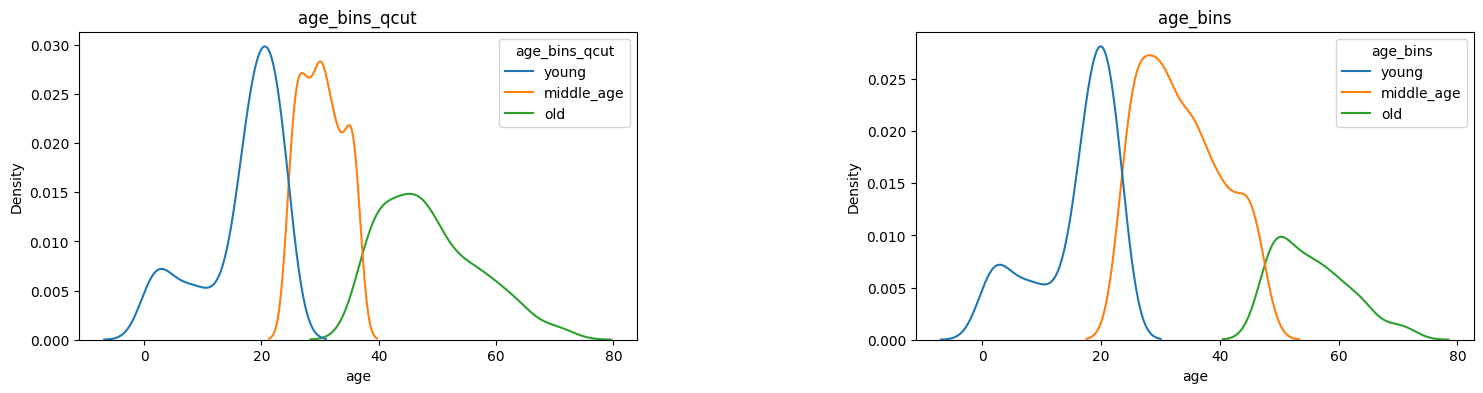

In [30]:
import matplotlib.pyplot as plt  #for reshaping graph size

fig, ax = plt.subplots(1,2, figsize = (18,4))
plt.subplots_adjust(wspace = 0.5)

sns.kdeplot(data = titanic_df,x='age',hue= 'age_bins_qcut', ax = ax[0] );
ax[0].set_title('age_bins_qcut');

sns.kdeplot(data = titanic_df,x='age',hue= 'age_bins', ax = ax[1]);
ax[1].set_title('age_bins')




### And now :

In [31]:
titanic_df.groupby(['age_bins_qcut'], observed=False)['survived'].sum()

age_bins_qcut
young         114
middle_age     82
old            85
Name: survived, dtype: int64

> Instead of the predefined statistics, specific combinations of aggregating statistics for given columns can be defined using the `DataFrame.agg()` method:

In [32]:
titanic_df.agg({"age": ["count","min", "max", "median", "skew"]})

,age
count,633.000000
min,0.166700
max,71.000000
median,30.000000
skew,0.302984


### `pd.cut` vs `pd.qcut`

In [34]:
age_group_stats

,count,mean,std,min,25%,50%,75%,max
age_bins,,,,,,,,
young,209.0,15.946969,6.836041,0.1667,13.0,18.0,21.0,23.0
middle_age,325.0,33.596923,6.797829,24.0000,28.0,32.0,39.0,47.0
old,99.0,55.494949,6.255404,48.0000,50.0,54.0,60.0,71.0


In [37]:
age_group_stats2 = titanic_df.groupby(['age_bins_qcut'], observed=False)['age'].describe()
age_group_stats2

,count,mean,std,min,25%,50%,75%,max
age_bins_qcut,,,,,,,,
young,231.0,16.713925,6.919096,0.1667,14.0,19.0,22.0,24.0
middle_age,201.0,30.348259,3.550790,25.0000,27.0,30.0,33.0,36.0
old,201.0,48.681592,8.328752,37.0000,42.0,47.0,54.0,71.0


In [38]:
age_group_stats3 = titanic_df.groupby(['age_bins','age_bins_qcut'], observed=False)['age'].describe()
age_group_stats3

count       mean       std      min   25%   50%  \
age_bins   age_bins_qcut                                                    
young      young          209.0  15.946969  6.836041   0.1667  13.0  18.0   
middle_age young           22.0  24.000000  0.000000  24.0000  24.0  24.0   
           middle_age     201.0  30.348259  3.550790  25.0000  27.0  30.0   
           old            102.0  42.068627  3.118961  37.0000  39.0  42.0   
old        old             99.0  55.494949  6.255404  48.0000  50.0  54.0   

                           75%   max  
age_bins   age_bins_qcut              
young      young          21.0  23.0  
middle_age young          24.0  24.0  
           middle_age     33.0  36.0  
           old            45.0  47.0  
old        old            60.0  71.0

### **1. `pd.cut` - Division into Fixed Numerical Ranges**

#### When to Use:

- Use when you want to divide data into **fixed numerical ranges**, not by the number of values.
- Suitable for data with a **relatively uniform distribution**, meaning there isn’t a high concentration of values in specific ranges.
- Ideal for analyzing specific numerical ranges, such as:
  - Age ranges (e.g., 0-20, 20-40, 40-60).
  - Known financial intervals.

#### Example for Using `pd.cut`:

Suppose you have Titanic passengers' ages (ranging from 0 to 80), and most passengers are evenly spread across this range. If you divide the ages into 3 bins, the division would look like this:

- **Bin 1 (0-27):** Young passengers.
- **Bin 2 (27-53):** Middle-aged passengers.
- **Bin 3 (53-80):** Older passengers.

**Advantage**: Easy to interpret the meaning of each range in numerical terms.  
**Disadvantage**: If most passengers are young (e.g., 80% are between 0-27), this range will be "overcrowded," making it hard to analyze the entire population fairly.

---

### **2. `pd.qcut` - Division into Equal-Sized Groups**

#### When to Use:

- Use when you want to divide the data into bins with an **equal number of values**.
- Suitable for data with a **non-uniform distribution**, where values are concentrated in specific ranges.
- Ideal for creating balanced groups that represent **quantiles** (e.g., terciles or quartiles).


#### Example for Using `pd.qcut`:

Using the same Titanic age data, suppose 80% of passengers are aged 0-27, and only 20% are aged 27-80. If you use `pd.qcut` to divide the data into 3 bins, the division would look like this:

- **Bin 1 (0-15):** The first tercile of passengers (very young).
- **Bin 2 (15-30):** The second tercile (slightly older).
- **Bin 3 (30-80):** The last tercile (older passengers).

**Advantage**: Each bin contains an equal number of passengers, even if the distribution is uneven.  
**Disadvantage**: The numerical ranges may be harder to interpret intuitively (e.g., uneven ranges like 0-15, 15-30).

---

### **Comparison Between the Two Methods**

| **Feature**                    | **`pd.cut`**                              | **`pd.qcut`**                             |
|--------------------------------|-------------------------------------------|-------------------------------------------|
| **Division by ranges**         | Divides into equal numerical ranges.       | Divides into ranges with equal number of values. |
| **Number of values per range** | May vary across ranges.                    | Almost equal in every category.           |
| **Use case**                   | Analysis based on fixed numerical ranges.  | Analysis based on equal-sized groups.     |
| **Suitable for data distribution** | Uniform or near-uniform distribution.      | Non-uniform distribution or with dense clusters. |

### [▲](#Top)

---


<a id='3'></a>
<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">Boxplot.</h1>

In [27]:
import seaborn as sns  # for creating the graphs
import matplotlib.pyplot as plt  #for reshaping graph size
import numpy as np
import random

Check the [matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) for even more styling options

Read more about [here](https://chartio.com/learn/charts/box-plot-complete-guide/#best-practices-for-using-a-box-plot)

<a id='section1'></a>

<h1 style="background-color: #FFFFFF; color: #0046d6; border-radius: 10px; text-align: center; 
<div class="image-container">
  <img src= "https://github.com/Razelbaz1/exercises-package/blob/master/pics/boxplot.png?raw=true"
    alt="Centered Image" width="800" height="200" /> </div>


## How It Works

---

In [28]:
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [29]:
blue, orange, green, red = sns.color_palette()[:4]

#### Suppose we have a list of values.

In [30]:
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]

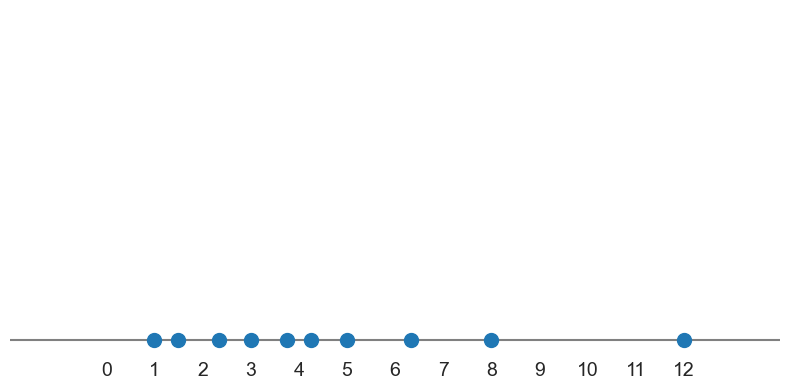

In [31]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=blue)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

In [32]:
pd.Series(pts).describe()

count    10.000000
mean      4.716667
std       3.341010
min       1.000000
25%       2.500000
50%       4.000000
75%       6.000000
max      12.000000
dtype: float64

#### Draw the median

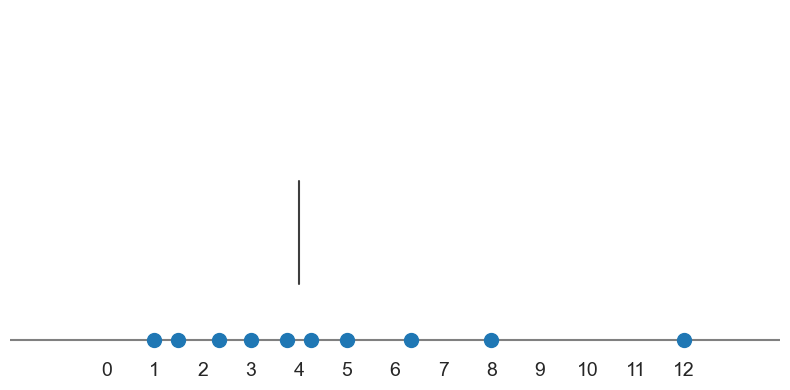

In [33]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=blue)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')  #median at 4
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

#### Draw the 25th percentile

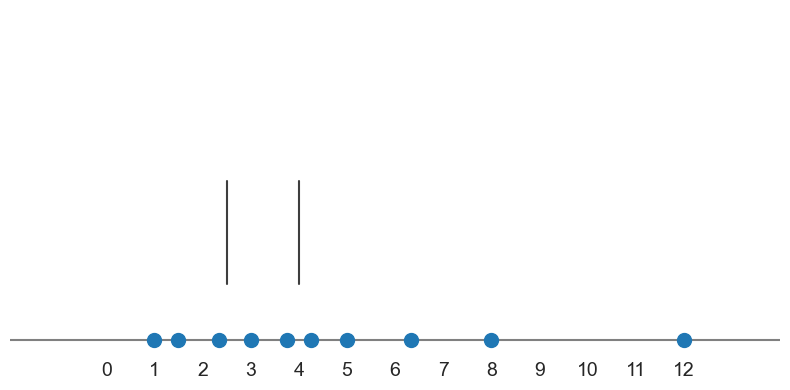

In [34]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=blue)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E') 
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E') #25th percentile
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

#### Draw the 25th percentile on the other side that now represent the 75th percentile

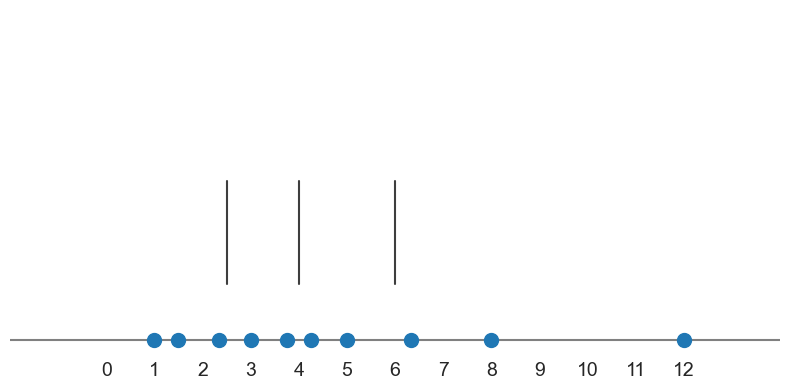

In [35]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=blue)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')  
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')  
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')   #75th percentile
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

#### Connect the lines and paint

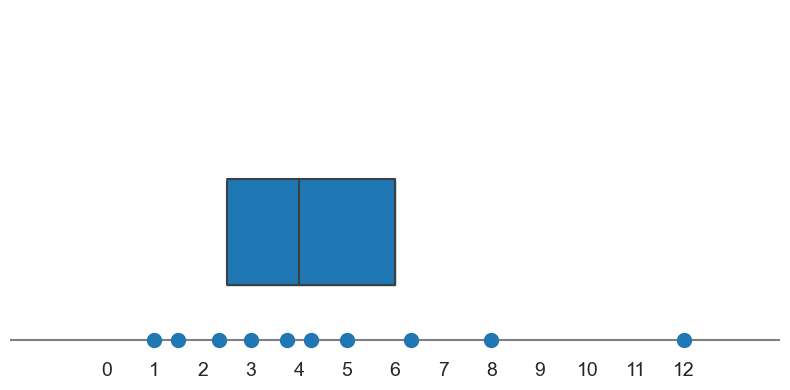

In [36]:
xvals=np.linspace(2.5, 6, 100)

plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=blue)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')  #connect box
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')  #connect box
plt.gca().fill_between(xvals, 0.092, 0.268, color=blue)  #add color
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

### Add upper & lower whiskers.

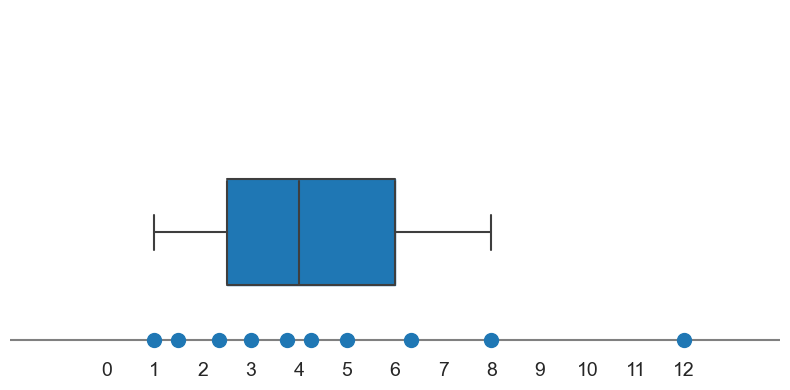

In [37]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=blue)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.18, xmin=(3/16), xmax=(4.5/16), color='#3E3E3E')
plt.axvline(1, ymin=0.3, ymax=0.4, color='#3E3E3E')
plt.axhline(0.18, xmin=(8/16), xmax=(10/16), color='#3E3E3E') #add upper whisker
plt.axvline(8, ymin=0.3, ymax=0.4, color='#3E3E3E')           #add upper whisker
plt.gca().fill_between(xvals, 0.092, 0.268, color=blue)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

#### Add outlier

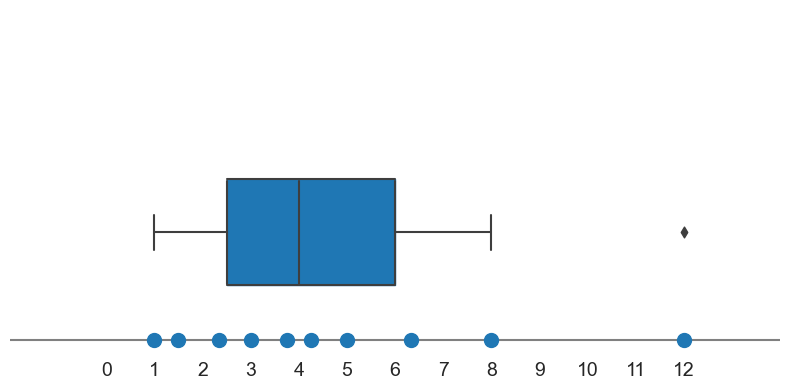

In [38]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=blue)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.18, xmin=(3/16), xmax=(4.5/16), color='#3E3E3E')
plt.axvline(1, ymin=0.3, ymax=0.4, color='#3E3E3E')
plt.axhline(0.18, xmin=(8/16), xmax=(10/16), color='#3E3E3E')
plt.axvline(8, ymin=0.3, ymax=0.4, color='#3E3E3E')
plt.scatter(12, 0.18, marker="d", s=30, color='#3E3E3E')  #add flier
plt.gca().fill_between(xvals, 0.092, 0.268, color=blue)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

#### check manual against seaborn plot.

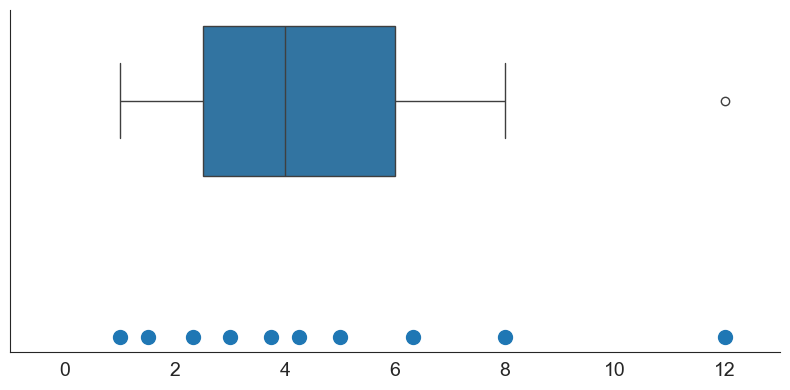

In [39]:
plt.figure(figsize=(8,4))
sns.boxplot(x = pts, color=blue, width=0.3,)
plt.scatter(pts, [0.47]*len(pts), s=100, zorder=10, color=blue)
sns.despine()
plt.xlim(-1, 13)


plt.tight_layout();

#### And in general a box plot will be obtained from the following form.

<div class="image-container">
  <img src= "https://github.com/Razelbaz1/exercises-package/blob/master/pics/box-plot-construction.png?raw=true"
    alt="Centered Image" width="800" height="200" /> </div>


### [▲](#Top)
---

## Example

In [40]:
# Creating a first DataFrame with the relative distribution of scores in the center and an average of 75
np.random.seed(0)
num_students = 80
grades = np.random.randint(60, 90, num_students)  # grade range 60-89
student_ids = range(1, num_students + 1)
names = ['Student ' + str(i) for i in range(1, num_students + 1)]
df1 = pd.DataFrame({'ID': student_ids, 'Name': names, 'Grade': grades})

# Creating a second DataFrame with the distribution of scores at the edges and an average of 75
np.random.seed(1)
grades_low = np.random.randint(40, 60, num_students // 2)  # grade range  40-59
grades_high = np.random.randint(90, 100, num_students // 2)  # grade range  90-99
grades = np.concatenate((grades_low, grades_high))
random.shuffle(grades)  # shuffle grades
df2 = pd.DataFrame({'ID': student_ids, 'Name': names, 'Grade': grades})

print("DataFrame 1:", '            '"DataFrame 2:")
pd.concat([df1, df2], axis=1).head(10)

DataFrame 1:             DataFrame 2:


,ID,Name,Grade,ID,Name,Grade
0,1,Student 1,72,1,Student 1,51
1,2,Student 2,75,2,Student 2,44
2,3,Student 3,81,3,Student 3,95
3,4,Student 4,60,4,Student 4,94
4,5,Student 5,63,5,Student 5,97
5,6,Student 6,87,6,Student 6,48
6,7,Student 7,63,7,Student 7,50
7,8,Student 8,67,8,Student 8,46
8,9,Student 9,69,9,Student 9,96
9,10,Student 10,79,10,Student 10,54


#### Let's look at the statistics for each table, but we'll want to look at the data so that it's convenient for us to look at both at the same time - we'll add them together.

In [41]:
# Change column name from 'Grade' in-`df1` to 'grade_df1'
df1.rename(columns={'Grade': 'grade_df1'}, inplace=True)

# Change column name from 'Grade' in-`df2` to 'grade_df2'
df2.rename(columns={'Grade': 'grade_df2'}, inplace=True)

In [42]:

# merge the data frames 
merged_df = pd.concat([df1, df2], ignore_index=True)

# print merge df 
print(merged_df)


     ID        Name  grade_df1  grade_df2
0     1   Student 1       72.0        NaN
1     2   Student 2       75.0        NaN
2     3   Student 3       81.0        NaN
3     4   Student 4       60.0        NaN
4     5   Student 5       63.0        NaN
..   ..         ...        ...        ...
155  76  Student 76        NaN       58.0
156  77  Student 77        NaN       53.0
157  78  Student 78        NaN       93.0
158  79  Student 79        NaN       92.0
159  80  Student 80        NaN       41.0

[160 rows x 4 columns]


In [43]:
merged_df.describe().round(3)

,ID,grade_df1,grade_df2
count,160.000,80.000,80.000
mean,40.500,73.100,72.462
std,23.165,8.679,23.235
min,1.000,60.000,40.000
25%,20.750,65.000,49.750
50%,40.500,74.000,74.500
75%,60.250,80.000,95.250
max,80.000,89.000,99.000


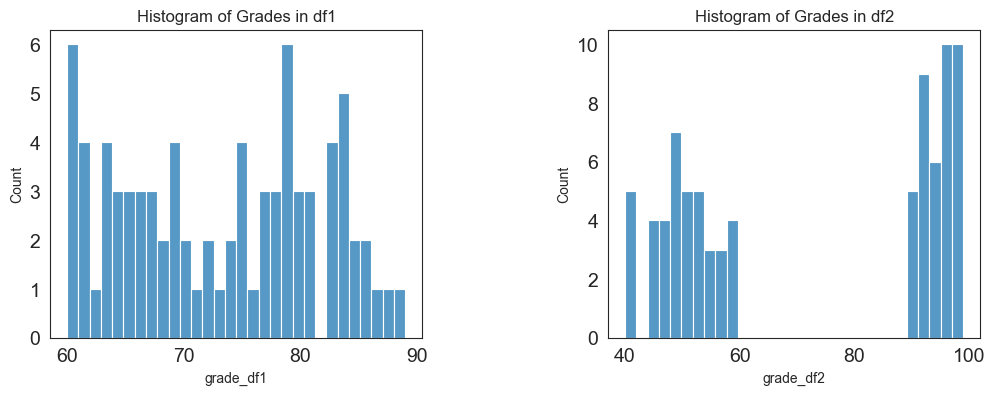

In [44]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

# Create histograms for the 'Grade' column in df1 and df2 with titles
sns.histplot(data = df1, x = 'grade_df1', ax = ax[0], bins=30)
ax[0].set_title('Histogram of Grades in df1')

sns.histplot(data = df2, x = 'grade_df2', ax = ax[1], bins=30)
ax[1].set_title('Histogram of Grades in df2')

plt.show()

C:\Users\razel\AppData\Local\Temp\ipykernel_27192\1189554876.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Grade', data=combined_df, showmeans=True,


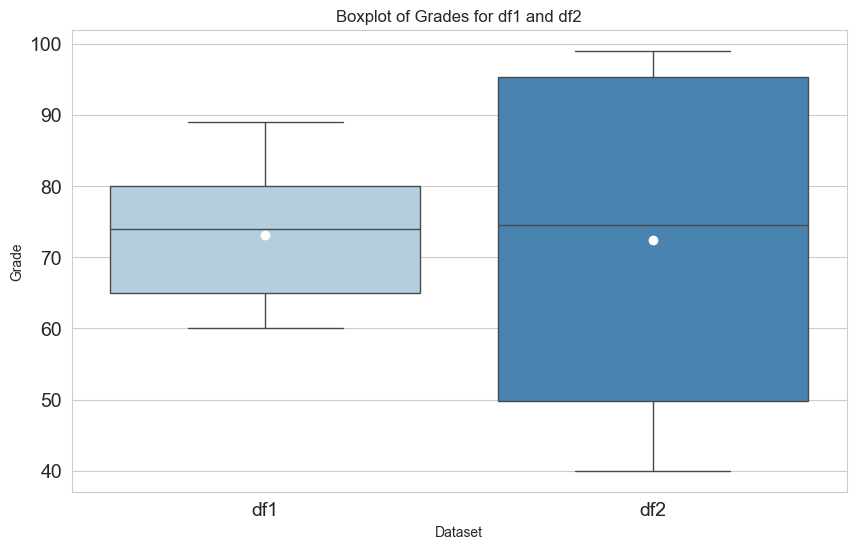

In [90]:
# Change column name from 'Grade' in-`df1` to 'grade_df1'
df1.rename(columns={'grade_df1': 'Grade'}, inplace=True)

# Change column name from 'Grade' in-`df2` to 'grade_df2'
df2.rename(columns={'grade_df2': 'Grade'}, inplace=True)


# Combine both DataFrames for plotting
combined_df = pd.concat([df1.assign(Dataset='df1'), df2.assign(Dataset='df2')])

# Create a boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dataset', y='Grade', data=combined_df, showmeans=True,
            meanprops={'marker' : 'o', 'markerfacecolor':'white', 'markeredgecolor':'white'},palette='Blues', meanline=False)

# Set labels and title
plt.xlabel('Dataset')
plt.ylabel('Grade')
plt.title('Boxplot of Grades for df1 and df2')

# Show the plot
plt.show()

C:\Users\razel\AppData\Local\Temp\ipykernel_27192\3141036762.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Grade', data=combined_df, showmeans=True, ax=axes[0],


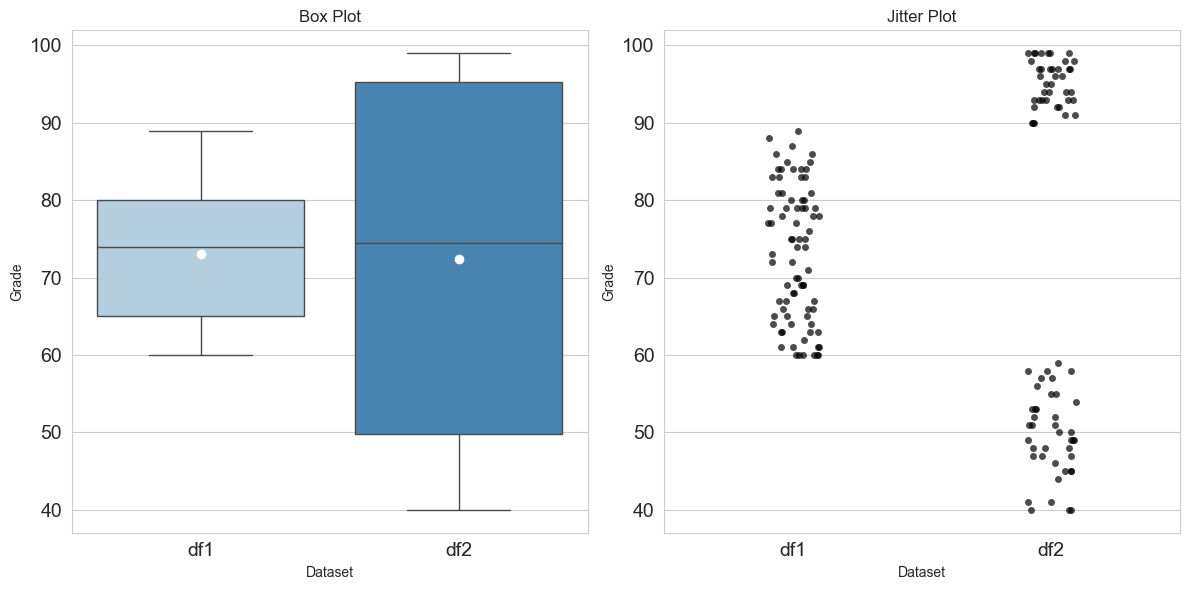

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot
# Create a boxplot using seaborn
sns.boxplot(x='Dataset', y='Grade', data=combined_df, showmeans=True, ax=axes[0],
            meanprops={'marker' : 'o', 'markerfacecolor':'white', 'markeredgecolor':'white'},palette='Blues', meanline=False)
axes[0].set_title("Box Plot")

# Jitter plot (Strip plot)
sns.stripplot(x='Dataset', y='Grade', data=combined_df, jitter=True, color='black', alpha=0.7, ax=axes[1])
axes[1].set_title("Jitter Plot")

# Adjust layout
plt.tight_layout()
plt.show()


In [47]:
# Change column name from 'Grade' in-`df1` to 'grade_df1'
df1.rename(columns={'Grade': 'grade_df1'}, inplace=True)

# Change column name from 'Grade' in-`df2` to 'grade_df2'
df2.rename(columns={'Grade': 'grade_df2'}, inplace=True)

In [48]:
#df1.describe()

In [49]:
#df2.describe()

In [50]:
import pandas as pd

# list of grades
grades_to_calculate = [i  for i in range(60,90)]

# new data frame for calculation
results_df = pd.DataFrame({'Grade': grades_to_calculate})

# 
results_df['Frequency'] = [len(df1[df1['grade_df1'] == grade]) for grade in grades_to_calculate]
results_df['Relative Frequency'] = results_df['Frequency'] / len(df1)
results_df['Cumulative Relative Frequency'] = results_df['Relative Frequency'].cumsum()

# final result

In [51]:
# Define a function to highlight specific rows
def highlight_specific_rows(s, rows_to_highlight):
    # Create a boolean mask for rows to highlight
    mask = s.index.isin(rows_to_highlight)
    # Create a DataFrame of styles
    styles = pd.DataFrame('', index=s.index, columns=s.columns)
    # Set the background color for the specified rows
    styles.loc[mask, :] = 'background-color: yellow'
    return styles

# Rows to highlight (in this case, rows 5 and 20)
rows_to_highlight = [5, 20]

# Apply the styling to the DataFrame
styled_results_df = results_df.style.apply(highlight_specific_rows, rows_to_highlight=rows_to_highlight, axis=None)

# Display the styled DataFrame
styled_results_df


,Grade,Frequency,Relative Frequency,Cumulative Relative Frequency
0,60,6,0.075000,0.075000
1,61,4,0.050000,0.125000
2,62,1,0.012500,0.137500
3,63,4,0.050000,0.187500
4,64,3,0.037500,0.225000
5,65,3,0.037500,0.262500
6,66,3,0.037500,0.300000
7,67,3,0.037500,0.337500
8,68,2,0.025000,0.362500
9,69,4,0.050000,0.412500


In [52]:
grade_q1, grade_q3 = df1.grade_df1.quantile(.25), df1.grade_df1.quantile(.75)

grade_upper = grade_q3 + (grade_q3 - grade_q1)*1
grade_lower = grade_q1 - (grade_q3 - grade_q1)*1
print(f"Q1 = { grade_q1}")
print(f"Q3 = {grade_q3}")
print(f"upper whisker = {grade_upper}")
print(f"lower whisker = {grade_lower}")

df1[(df1.grade_df1>grade_upper)|(df1.grade_df1<grade_lower)].count()[0]
# almost 3% .. let's consider it as a special pieces

Q1 = 65.0
Q3 = 80.0
upper whisker = 95.0
lower whisker = 50.0


C:\Users\razel\AppData\Local\Temp\ipykernel_27192\3121981807.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1[(df1.grade_df1>grade_upper)|(df1.grade_df1<grade_lower)].count()[0]


np.int64(0)

<a id='4'></a>

<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="introduction">Working with Boxplot.</h1>

In [53]:
sns.set_style('whitegrid')

In [54]:
cars = sns.load_dataset('mpg').dropna()

cars.shape

(392, 9)

In [55]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Filter down to only cars with even number of cylinders

In [56]:
cars = cars[cars.cylinders.isin([4,6,8])]

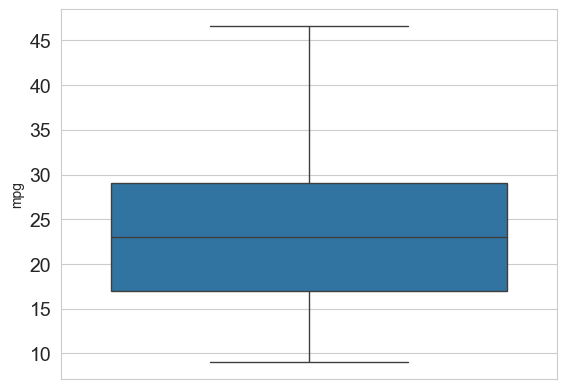

In [57]:
sns.boxplot(cars.mpg);

In [58]:
cars.mpg.describe()

count    385.000000
mean      23.445455
std        7.836911
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

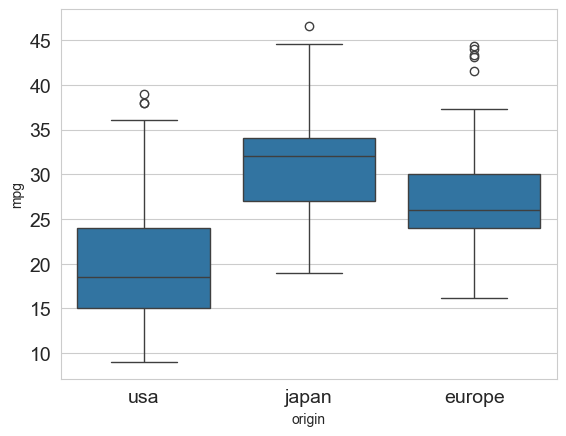

In [59]:
sns.boxplot(x=cars.origin, y=cars.mpg);

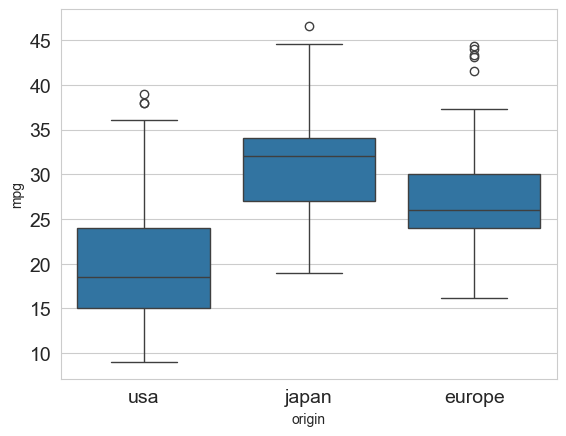

In [60]:
sns.boxplot(x='origin', y='mpg', data=cars);

### Hue

#### By Cylinders

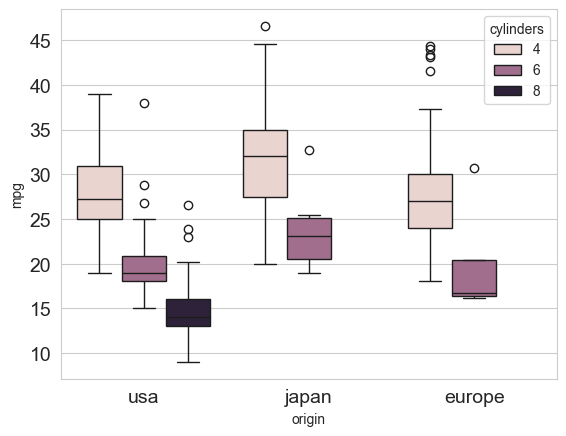

In [61]:
sns.boxplot(x='origin', y='mpg', hue='cylinders', data=cars);

#### By Model Year

In [62]:
cars.model_year.describe()

count    385.000000
mean      75.961039
std        3.692058
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64

In [63]:
cars['newer_model'] = cars.model_year > 76

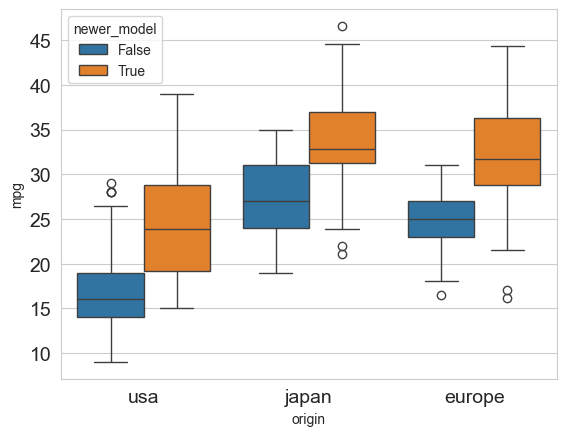

In [64]:
sns.boxplot(x='origin', y='mpg', hue='newer_model', data=cars);

## Styling Options

### order

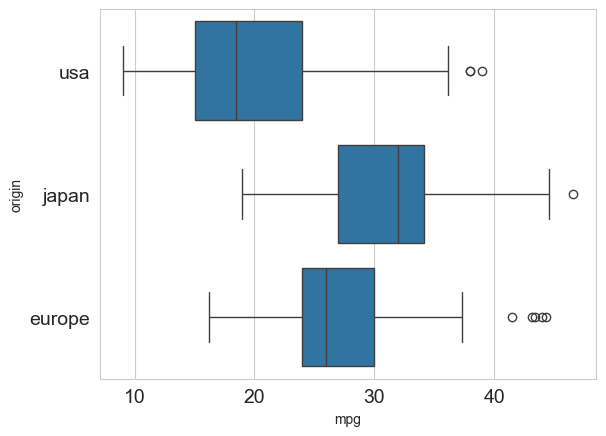

In [65]:
sns.boxplot(x='mpg', y='origin',   
            data=cars
           );

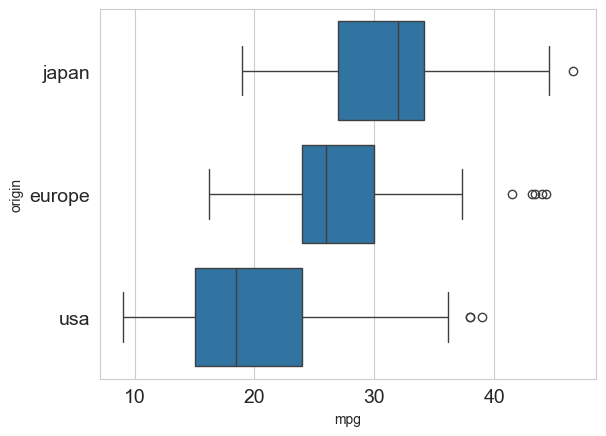

In [66]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            order=['japan', 'europe', 'usa']
           );

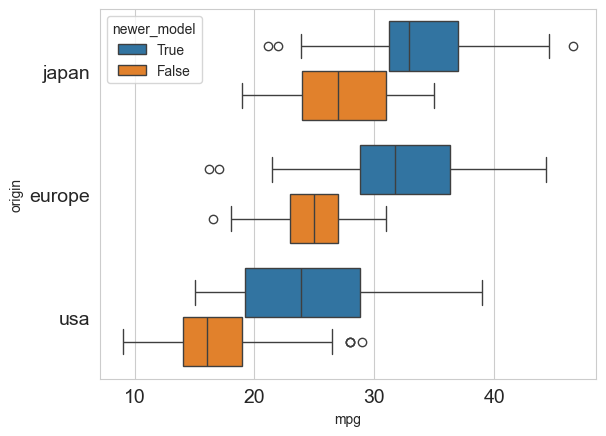

In [67]:
sns.boxplot(x='mpg', y='origin', hue='newer_model',
            data=cars,
            order=['japan', 'europe', 'usa'],
            hue_order=[True, False]
           );

### color

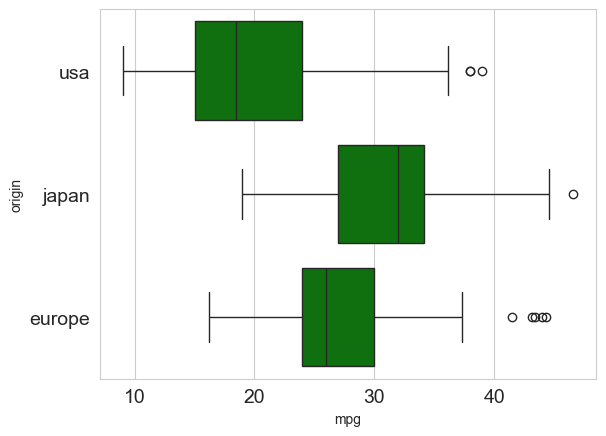

In [68]:
sns.boxplot(x='mpg', y='origin',  
            data=cars, 
            color='g'
           );

C:\Users\razel\AppData\Local\Temp\ipykernel_27192\556650917.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:g'` for the same effect.

  sns.boxplot(x='mpg', y='origin', hue='newer_model',


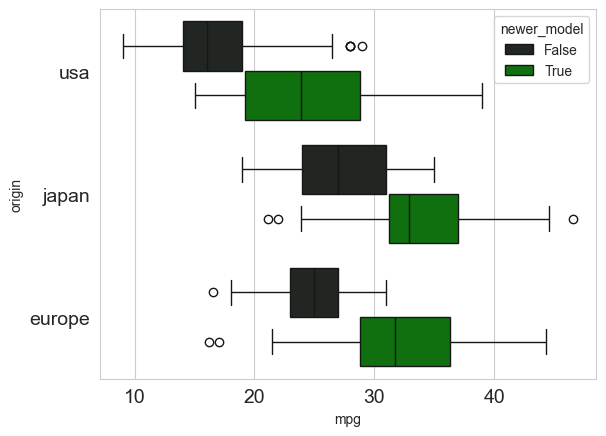

In [69]:
sns.boxplot(x='mpg', y='origin', hue='newer_model',
            data=cars,
            color='g'
           );

### width

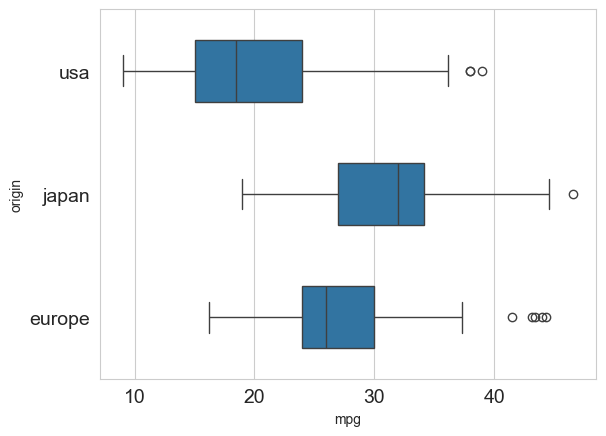

In [70]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            width=0.5
           ); 

### linewidth

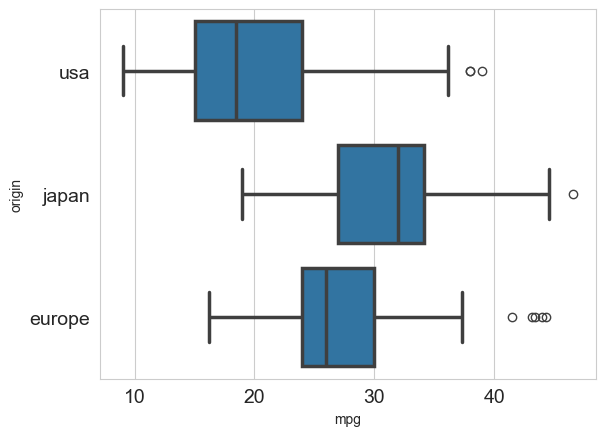

In [71]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            linewidth=2.5
           );

### whis

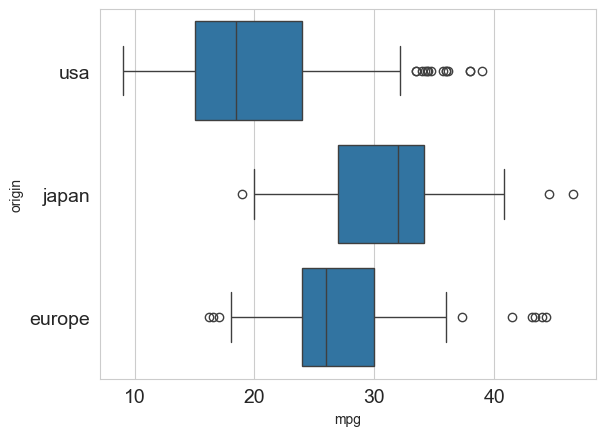

In [72]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            whis=1
           );

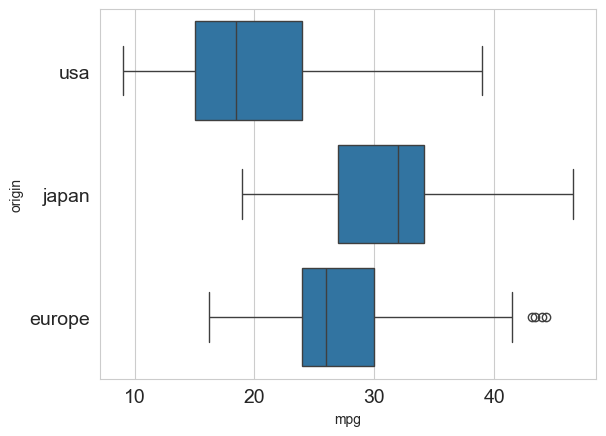

In [73]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            whis=2
           );

### fliersize

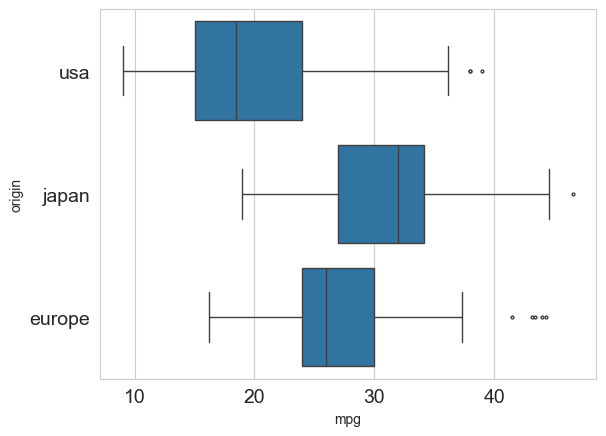

In [74]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            fliersize=2
           );

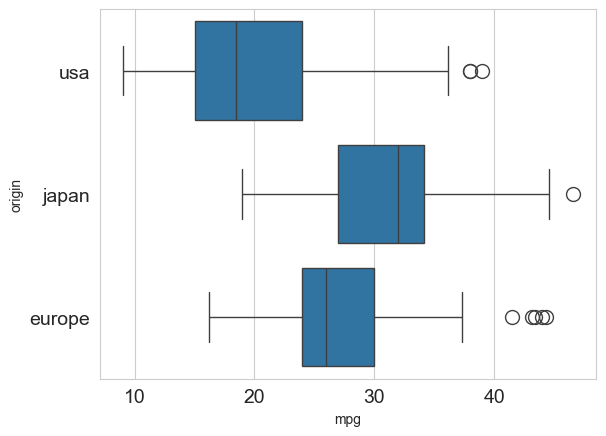

In [75]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            fliersize=10
           );

### showcaps

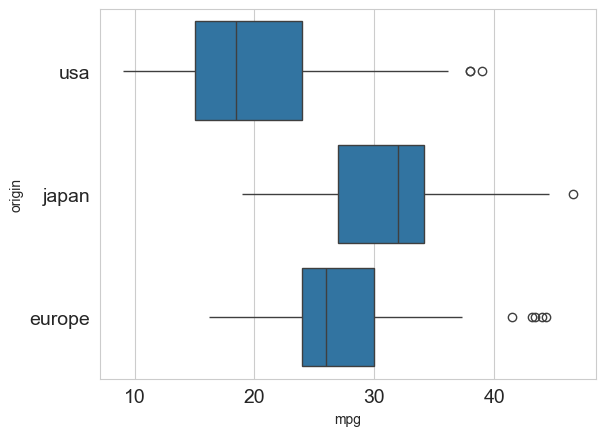

In [76]:
sns.boxplot(x='mpg', y='origin', 
            data=cars,
            showcaps=False
           );

#### In some cases we would like to know starting from which value the boxplot considers the values as outliers.
#### We can know the exact value and even count how many values are considered outliers.
#### Suggest a way to do this and calculate what percentage of the data are outliers.

Here are data on diamonds, show starting from which upper and lower value the values are considered to be outliers according to the __"carat"__ column and show the size of the outliers in percentages

In [77]:
url = 'https://raw.githubusercontent.com/Razelbaz1/exercises-package/master/data/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [78]:
carat_q1, carat_q3 = diamonds['carat'].quantile(0.25), diamonds['carat'].quantile(0.75)

print(f'carat q1: {carat_q1}')
print(f'carat q3: {carat_q3}')



carat q1: 0.4
carat q3: 1.04


In [79]:
carat_upper = carat_q3 + (carat_q3 - carat_q1)*1.5
carat_lower = carat_q1 - (carat_q3 - carat_q1)*1.5

print(f'carat_upper:  {carat_upper}')
print(f'carat_lower:  {carat_lower}')

carat_upper:  2.0
carat_lower:  -0.5599999999999999


In [80]:
outlier = diamonds[(diamonds.carat>carat_upper)|(diamonds.carat<carat_lower)].count()[0]
# almost 3%

C:\Users\razel\AppData\Local\Temp\ipykernel_27192\4202954157.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  outlier = diamonds[(diamonds.carat>carat_upper)|(diamonds.carat<carat_lower)].count()[0]


In [81]:
diamonds.describe().round(1)

,carat,depth,table,price,x,y,z
count,53940.0,53940.0,53940.0,53940.0,53940.0,53940.0,53940.0
mean,0.8,61.7,57.5,3932.8,5.7,5.7,3.5
std,0.5,1.4,2.2,3989.4,1.1,1.1,0.7
min,0.2,43.0,43.0,326.0,0.0,0.0,0.0
25%,0.4,61.0,56.0,950.0,4.7,4.7,2.9
50%,0.7,61.8,57.0,2401.0,5.7,5.7,3.5
75%,1.0,62.5,59.0,5324.2,6.5,6.5,4.0
max,5.0,79.0,95.0,18823.0,10.7,58.9,31.8


In [82]:
outlier/diamonds.describe().loc['count',['carat']]

carat    0.03502
Name: count, dtype: float64

<Axes: ylabel='carat'>

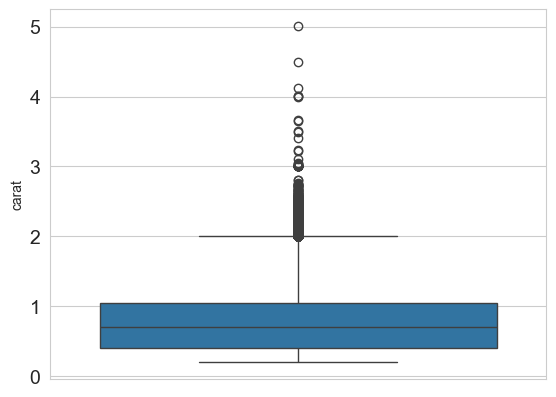

In [83]:
sns.boxplot(data=diamonds,y='carat')